# Stackoverflow developer survey analysis --Assighnment

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import regex
import pycountry_convert as pc

%matplotlib inline
pd.set_option('display.max_columns', None)

## Understanding the data

In [2]:
# loading the Data and Schema using Pandas
df = pd.read_csv("survey_results_public.csv", low_memory = False)
schema = pd.read_csv("survey_results_schema.csv")

df.head(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [3]:
# keeping the copy of data 
df_original = df.copy()

# now lets get some basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

In [4]:
# let's print what are the columns present in the schema
for i in enumerate(list(schema['Column'])):
    print(i)

(0, 'Respondent')
(1, 'MainBranch')
(2, 'Hobbyist')
(3, 'OpenSourcer')
(4, 'OpenSource')
(5, 'Employment')
(6, 'Country')
(7, 'Student')
(8, 'EdLevel')
(9, 'UndergradMajor')
(10, 'EduOther')
(11, 'OrgSize')
(12, 'DevType')
(13, 'YearsCode')
(14, 'Age1stCode')
(15, 'YearsCodePro')
(16, 'CareerSat')
(17, 'JobSat')
(18, 'MgrIdiot')
(19, 'MgrMoney')
(20, 'MgrWant')
(21, 'JobSeek')
(22, 'LastHireDate')
(23, 'LastInt')
(24, 'FizzBuzz')
(25, 'JobFactors')
(26, 'ResumeUpdate')
(27, 'CurrencySymbol')
(28, 'CurrencyDesc')
(29, 'CompTotal')
(30, 'CompFreq')
(31, 'ConvertedComp')
(32, 'WorkWeekHrs')
(33, 'WorkPlan')
(34, 'WorkChallenge')
(35, 'WorkRemote')
(36, 'WorkLoc')
(37, 'ImpSyn')
(38, 'CodeRev')
(39, 'CodeRevHrs')
(40, 'UnitTests')
(41, 'PurchaseHow')
(42, 'PurchaseWhat')
(43, 'LanguageWorkedWith')
(44, 'LanguageDesireNextYear')
(45, 'DatabaseWorkedWith')
(46, 'DatabaseDesireNextYear')
(47, 'PlatformWorkedWith')
(48, 'PlatformDesireNextYear')
(49, 'WebFrameWorkedWith')
(50, 'WebFrameDesireN

##### now let's begin our analysis process
### a) Find the average age of developers when they wrote their first line of code

In [5]:
def avg_age(df)->'None':
    
    '''
        Function used to find the average age of Developers
        
        input: Dataframe, object
        
        output: prints the average age of developers when they wrote their first line of code.
        
        returns: None
    
    '''
    #let's create an empty list to store the ages
    total = []
    
    #looping through the df.Age1stCode
    for i in list(df.Age1stCode):
        
        #hear we are using exception to make our code to work properlly
        try:
            total.append(int(i))
            
        except:
            temp = regex.findall('.*([0-9]+).*',str(i))
            
            if temp:
                val = [int(s) for s in i.split() if s.isdigit()][0]
                total.append(val)

    print(f'Average Age of developers when they wrote their first line of code {round(np.mean(total),2)}')

In [6]:
avg_age(df)

Average Age of developers when they wrote their first line of code 15.42


### b. Deduce the percentage of developers who know python in each country.

In [7]:
# now lets load our orinal data frame from previosly stored object
df = df_original.copy()

# let's consider the reqired columns nessesary for this analysis
df = df[['LanguageWorkedWith','Country']]

In [8]:
# now lets get the count of developers present in each country in sorted version
devolopers_all = df.Country.value_counts()
devolopers_all = devolopers_all.sort_index()

In [9]:
def lang_presesnt_or_not(df,language)->None:
    
    '''
    
    This function will add a column called launguage in the dataframe and add the values 1 of the given input
    language is present else 0
    
    input: df: Dataframe, object
           language: laguge needs to be proceesed, string
           
    output: None
    
    '''
    df['LanguageWorkedWith'].fillna(value = 0)
    
    # We have to split the LanguageWorkedWith to get a proper results with respect to input language
    unique_languages = []

    # split the df on ;
    for language_set in df['LanguageWorkedWith'].apply(lambda row: str(row).split(';')):

            if str(language) in language_set:
                unique_languages.append(1)
            else:
                unique_languages.append(0)
                
    #adding the obtained values in the Dataframe with the name language
    df[language] = unique_languages
    

In [10]:
lang_presesnt_or_not(df,'Python')

In [11]:
# total number of python developes in each contries
devolopers_python = df.groupby('Country').sum()

In [12]:
# now let's caleculete avg and print out our results 
for num,i in enumerate(devolopers_all.keys()):
    percentage = [(devolopers_python.loc[i]/devolopers_all.loc[i])*100][0][0]
    print(f'{num}) In {i} there are {percentage} of people will use python')
    print()

0) In Afghanistan there are 18.181818181818183 of people will use python

1) In Albania there are 26.744186046511626 of people will use python

2) In Algeria there are 29.850746268656714 of people will use python

3) In Andorra there are 0.0 of people will use python

4) In Angola there are 40.0 of people will use python

5) In Antigua and Barbuda there are 0.0 of people will use python

6) In Argentina there are 34.53887884267631 of people will use python

7) In Armenia there are 32.55813953488372 of people will use python

8) In Australia there are 41.51339989490278 of people will use python

9) In Austria there are 40.286054827175214 of people will use python

10) In Azerbaijan there are 34.69387755102041 of people will use python

11) In Bahamas there are 66.66666666666666 of people will use python

12) In Bahrain there are 22.22222222222222 of people will use python

13) In Bangladesh there are 33.71900826446281 of people will use python

14) In Barbados there are 33.3333333333333

175) In Viet Nam there are 33.76623376623377 of people will use python

176) In Yemen there are 15.789473684210526 of people will use python

177) In Zambia there are 33.33333333333333 of people will use python

178) In Zimbabwe there are 35.8974358974359 of people will use python



## c. Generate a report for the average salary of developer based on continent.

In [13]:
# now lets load our orinal data frame from previosly stored object

df = df_original.copy()

# now let's get the continent of each country.

#correcting Country names which are specified as wrong
df['Country'].replace({'Hong Kong (S.A.R.)':'Hong Kong'}, inplace = True)
df['Country'].replace({'Libyan Arab Jamahiriya':'Libya'}, inplace = True)
df['Country'].replace({'Venezuela, Bolivarian Republic of...': 'Venezuela, Bolivarian Republic of'}, inplace = True)
df['Country'].replace({'Other Country (Not Listed Above)': 'India'}, inplace = True)
df['Country'].replace({'The former Yugoslav Republic of Macedonia': 'Macedonia'},  inplace = True)
df['Country'].replace({'Republic of Korea': 'Korea, Republic of'}, inplace = True)
df['Country'].replace({'Congo, Republic of the...': 'Congo, The Democratic Republic of the'}, inplace = True)
df['Country'].replace({'Timor-Leste': ' '}, inplace = True)
df.fillna(' ',inplace=True)

In [14]:
def contentent_of_country(df)->None:
    
    '''
    
    This function will add a column called continent in the dataframe and add the values of continent 
    with respect to each country
    
    input: df: Dataframe, object
    
    output: None
    
    '''
    
    continent=[]
    
    for num,i in enumerate(list(df['Country'])):

        try:
            country_code = pc.country_name_to_country_alpha2(str(i), cn_name_format="default")
            continent_name = pc.country_alpha2_to_continent_code(country_code)
            continent_name = pc.convert_continent_code_to_continent_name(continent_name)
            continent.append(continent_name)
            
        except KeyError:
            continent.append(' ')
            
    #storing the obtaibtned results in the dataframe
    df['continent'] =  continent

contentent_of_country(df)

In [15]:
df_temp = df[['continent','CompTotal']]

# total number of data points we have
dev_count_on_each_continent = df_temp.groupby('continent').count()
dev_count_on_each_continent

,CompTotal
continent,
,133
Africa,2749
Asia,18708
Europe,35843
North America,25494
Oceania,2434
South America,3522


In [16]:
# CompTotal column in the data frame has type objcet we need to convert this into int 
# object for further analysis

df_temp.replace(' ',0,regex=True, inplace=True)
df_temp['CompTotal'].astype(str).astype(float)
df_temp['CompTotal'].astype(int)

/home/nikhil/notebook/notebook/lib/python3.8/site-packages/pandas/core/frame.py:4383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


0            0
1            0
2        23000
3        61000
4            0
         ...  
88878        0
88879        0
88880        0
88881        0
88882        0
Name: CompTotal, Length: 88883, dtype: int64

In [17]:
# total salary of the each continent
total_sal_of_continent = df_temp.groupby('continent').sum()
total_sal_of_continent

,CompTotal
continent,
0,2.000001e+16
Africa,8.694643e+14
Asia,1.000665e+16
Europe,2.529794e+09
Oceania,1.608153e+08


In [18]:
# now let's caleculate the avg salary of continents and print our results 
continents = total_sal_of_continent['CompTotal'].keys()

for ind, (people, sal) in enumerate(zip(dev_count_on_each_continent['CompTotal'],total_sal_of_continent['CompTotal'])):
    
    if ind==0:
        print(f'Avarage salary of other continents is : {sal/people}')
        
    else:
        print(f'Avarage salary of {continents[ind]} is : {sal/people}')

Avarage salary of other continents is : 150375992273116.22
Avarage salary of Africa is : 316283850908.004
Avarage salary of Asia is : 534886179377.4782
Avarage salary of Europe is : 70579.87453617164
Avarage salary of Oceania is : 6307.967600219659


### d. Based on this survey, what will be the most desired programming language for the year 2020?


In [20]:
# now lets load our orinal data frame from previosly stored object

df = df_original.copy()

the top programmming launguage used in 2019 was HTML/CSS;JavaScript;PHP;SQL


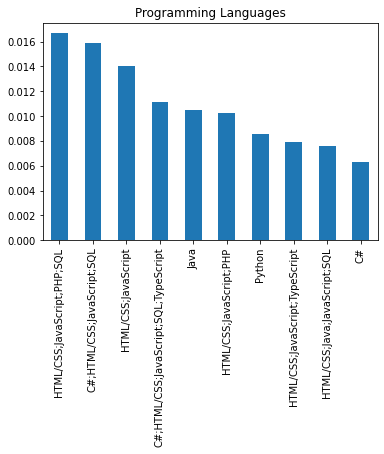

In [21]:
# 2019 top 10 programming languages are 
count_values = df.LanguageWorkedWith.value_counts()#Provide a pandas series of the counts for each LanguageWorkedWith

# display the top 10

(count_values[:10]/df.shape[0]).plot(kind="bar");
plt.title("Programming Languages");
print(f'the top programmming launguage used in 2019 was {count_values.keys()[0]}')

Most desired programming language for the year 2020 was Python


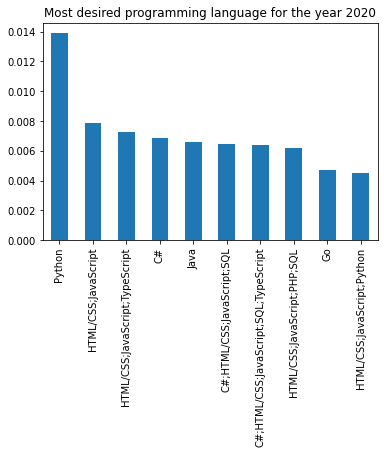

In [22]:
# Most desired programming language for the year 2020 was

count_values = df.LanguageDesireNextYear.value_counts()
(count_values[:10]/df.shape[0]).plot(kind="bar");

# display the top 10

plt.title("Most desired programming language for the year 2020")
print(f'Most desired programming language for the year 2020 was {count_values.keys()[0]}')

### e. What is the distribution of people who code as a hobby based on gender and continent?


In [784]:
# now lets load our orinal data frame from previosly stored object
df = df_original.copy()

# lets consider the column of data we want as saparate data frame
df = df[['Gender','Hobbyist']].copy()
df = df.join(df_temp['continent'])

In [785]:
# droping the rows with null values
df.dropna(inplace=True)

In [786]:
# getting the data whare people will code as there Hobby
df = df[df.Hobbyist=='Yes']

In [787]:
# geting the length of datframe and view of dataframe after removing null values 
print(df.shape)
df.head(2)

(68572, 3)


,Gender,Hobbyist,continent
0,Man,Yes,Europe
2,Man,Yes,Asia


In [788]:
# now we considerd people who codes as there hobby, now we can delete that col to make easy for further analysis
df = df.drop(columns = 'Hobbyist')
df.head()

,Gender,continent
0,Man,Europe
2,Man,Asia
4,Man,Europe
5,Man,0
7,Man,Asia


In [ ]:
# let's check how many unique elements are present
df["Gender"].unique()

In [789]:
# there are many types of gender are pesent, now let's consider them as only 3 types are present
df["Gender"] =df.apply(lambda x : x['Gender'] if (x['Gender'] =="Man" ) | (x['Gender'] =="Woman")  
                       else "other"  ,axis =1)

distribution = df.groupby( by=["continent","Gender"]).size()

In [790]:
# creating a new dataframe it makes it easy for further analysis
distribution_set =pd.DataFrame({'count' : df.groupby(
    by=['continent','Gender']).size()}).reset_index()

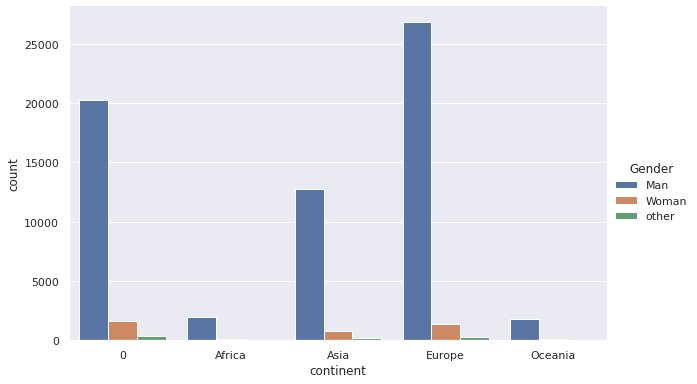

In [791]:
# we got our proceesed data lets plot our results using Seaborn
sns.catplot(x='continent', y='count', hue='Gender',
               data=distribution_set, kind='bar',height=5.27, aspect=11.7/7.27)


In [ ]:
# now we can see how the distribution of people who code as a hobby based on 
# gender and continent was distributed.

### f. Generate the report for job and career satisfaction of developer based on their gender and continent?

### g. For problems f and g, gender should have three categories man, woman and others. If a record have any other value, consider it as Others.

In [827]:
df = df_original.copy()

In [828]:
# lets consider the column of data that we want as saparate data frame
df = df[['CareerSat','JobSat','MainBranch','Gender']]
df = df.join(df_temp['continent'])

df.head(4)

,CareerSat,JobSat,MainBranch,Gender,continent
0,NaN,NaN,I am a student who is learning to code,Man,Europe
1,NaN,NaN,I am a student who is learning to code,Man,Europe
2,Slightly satisfied,Slightly satisfied,"I am not primarily a developer, but I write co...",Man,Asia
3,Very satisfied,Slightly satisfied,I am a developer by profession,Man,0


In [829]:
# let's check how many unique elements are present
df["Gender"].unique()

array(['Man', nan, 'Woman',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man',
       'Man;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [822]:
# there are many types of gender are pesent, now let's consider them as only 3 types are present
df["Gender"] =df.apply(lambda x : x['Gender'] if (x['Gender'] =="Man" ) | (x['Gender'] =="Woman")  
                       else "other"  ,axis =1)

In [823]:
# now we will drop the rows with Null values and reset the index
df.dropna(inplace=True)
df.reset_index(drop ='index',inplace=True)

# creating a new dataframe it makes it easy for further analysis
career_sat =pd.DataFrame({'count' : df.groupby(
    by=['continent','Gender','CareerSat']).size()}).reset_index()

In [824]:
# let's create new column called career_sat which combines CareerSatisfaction and Gender
career_sat["hue_col"]=career_sat['Gender'] +"_"+ career_sat["CareerSat"]
career_sat.head(2)

,continent,Gender,CareerSat,count,hue_col
0,0,Man,Neither satisfied nor dissatisfied,1328,Man_Neither satisfied nor dissatisfied
1,0,Man,Slightly dissatisfied,1702,Man_Slightly dissatisfied


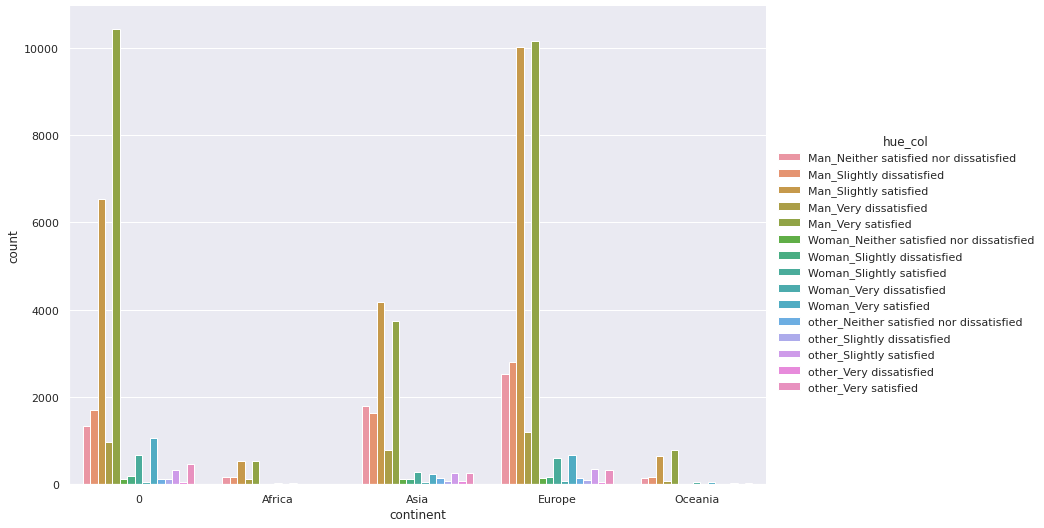

In [825]:
# we got our proceesed data lets plot our results using Seaborn
sns.catplot(x='continent', y='count', hue='hue_col',
               data=career_sat, kind='bar',height=7.27, aspect=1.5)


#### Hear we can see how our data is distributed based on the job and career satisfaction of developers with respect  their gender and continent


 '------------------------------------------------------------------------------------- Thank you------------------------------------------------------------------------------------------'